Dataset de Producciones de Teatro Musical en España (2011–2025)

Este dataset es propio y ha sido construido y diseñado, aplicando conocimiento del sector del teatro musical y recopilando información procedente de fuentes públicas, bases institucionales, notas de prensa, carteleras históricas y páginas oficiales de productoras y teatros.

El objetivo es modelizar una muestra representativa de las producciones de teatro musical estrenadas en España entre 2011 y 2025, con un enfoque analítico orientado a entender patrones de producción, concentración geográfica, dinámicas por productora, duración en cartel y presencia de giras.

El dataset no pretende ser un censo exhaustivo del sector, sino una muestra curada y coherente, estructurada para facilitar análisis exploratorios y la construcción de dashboards y modelos descriptivos. Incluye variables clave como productora, teatro de estreno, sede principal, año de inicio y fin, duración y si la obra realizó gira.


In [14]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos




In [15]:
df = pd.read_csv("musicales_limpio.csv")


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   obra              42 non-null     object 
 1   productora        42 non-null     object 
 2   anio_inicio       42 non-null     int64  
 3   anio_fin          29 non-null     float64
 4   teatro            42 non-null     object 
 5   ciudad_principal  42 non-null     object 
 6   gira              42 non-null     object 
 7   fuente_url        42 non-null     object 
 8   activa            42 non-null     bool   
 9   duracion          29 non-null     float64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 3.1+ KB


In [17]:
df.describe()

,anio_inicio,anio_fin,duracion
count,42.000000,29.000000,29.000000
mean,2020.595238,2022.172414,2.206897
std,3.793830,2.866917,2.304953
min,2011.000000,2015.000000,0.000000
25%,2018.000000,2020.000000,1.000000
50%,2022.000000,2023.000000,2.000000
75%,2023.000000,2024.000000,2.000000
max,2025.000000,2025.000000,12.000000


In [18]:
df.head(25)

,obra,productora,anio_inicio,anio_fin,teatro,ciudad_principal,gira,fuente_url,activa,duracion
0,"101 Dálmatas, el musical",Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2023,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://www.granteatrocaixabankprincipepio.com/,True,NaN
1,Aladdín,Stage Entertainment,2023,2025.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/aladdin/,False,2.0
2,Anastasia,Stage Entertainment,2018,2020.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/anastasia/,False,2.0
3,Avenue Q,Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2024,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://es.wikipedia.org/wiki/Avenue_Q,True,NaN
4,Billy Elliot,SOM Produce,2017,2020.0,Nuevo Teatro Alcalá,Madrid,Sí,https://somproduce.com/musicales/billy-elliot/,False,3.0
5,Cabaret,Let's Go Company,2025,NaN,Albéniz,Madrid,No,fuente: observación personal,True,NaN
6,Cenicienta,Stage Entertainment,2025,NaN,Coliseum,Madrid,No,fuente: observación personal,True,NaN
7,Charlie y la fábrica de chocolate,Let's Go Company,2021,2022.0,Espacio Ibercaja Delicias,Madrid,Sí,https://www.teatroalamedia.com/charlie-y-la-fa...,False,1.0
8,Chicago,SOM Produce,2023,2025.0,Teatro Apolo,Madrid,Sí,https://somproduce.com/musicales/chicago/,False,2.0
9,Dirty Dancing,Let's Go Company,2018,2023.0,Teatro Nuevo Alcalá,Madrid,Sí,https://www.entradas.com/artist/dirty-dancing/,False,5.0


In [19]:
df_2011 = df[df["anio_inicio"] >= 2011]


In [20]:
len(df_2011)


42

In [21]:
len(df) - len(df_2011)


0

In [22]:
df = df[df["anio_inicio"] >= 2011].copy()


=== DIMENSIONES DEL DATASET ===
Filas: 42, Columnas: 10

=== PRIMERAS FILAS ===


,obra,productora,anio_inicio,anio_fin,teatro,ciudad_principal,gira,fuente_url,activa,duracion
0,"101 Dálmatas, el musical",Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2023,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://www.granteatrocaixabankprincipepio.com/,True,NaN
1,Aladdín,Stage Entertainment,2023,2025.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/aladdin/,False,2.0
2,Anastasia,Stage Entertainment,2018,2020.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/anastasia/,False,2.0
3,Avenue Q,Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2024,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://es.wikipedia.org/wiki/Avenue_Q,True,NaN
4,Billy Elliot,SOM Produce,2017,2020.0,Nuevo Teatro Alcalá,Madrid,Sí,https://somproduce.com/musicales/billy-elliot/,False,3.0



=== ÚLTIMAS FILAS ===


,obra,productora,anio_inicio,anio_fin,teatro,ciudad_principal,gira,fuente_url,activa,duracion
37,"The Full Monty, el musical",Theatre Properties,2022,2023.0,Teatro Rialto,Madrid,Sí,https://es.wikipedia.org/wiki/The_Full_Monty_(...,False,1.0
38,The Hole,Let's Go Company,2011,2023.0,Teatro Calderón / Giras,Madrid,Sí,https://letsgo.es/the-hole/,False,12.0
39,Tina,Stage Entertainment,2021,2023.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/tina/,False,2.0
40,We Will Rock You,Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2023,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://www.wewillrockyou.es,True,NaN
41,Mari i Cel,Dagoll Dagom,2024,2025.0,Teatre Victòria,Barcelona,Sí,https://maricelelmusical.cat/,False,1.0



=== INFO DEL DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   obra              42 non-null     object 
 1   productora        42 non-null     object 
 2   anio_inicio       42 non-null     int64  
 3   anio_fin          29 non-null     float64
 4   teatro            42 non-null     object 
 5   ciudad_principal  42 non-null     object 
 6   gira              42 non-null     object 
 7   fuente_url        42 non-null     object 
 8   activa            42 non-null     bool   
 9   duracion          29 non-null     float64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 3.1+ KB

=== DESCRIPTIVO ESTADÍSTICO (INCLUYE CATEGÓRICAS) ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
obra,42,41,Kinky Boots,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productora,42,9,Let's Go Company,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anio_inicio,42.0,NaN,NaN,NaN,2020.595238,3.79383,2011.0,2018.0,2022.0,2023.0,2025.0
anio_fin,29.0,NaN,NaN,NaN,2022.172414,2.866917,2015.0,2020.0,2023.0,2024.0,2025.0
teatro,42,27,Teatro Coliseum,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ciudad_principal,42,4,Madrid,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gira,42,2,Sí,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuente_url,42,41,fuente: observación personal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activa,42,2,False,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duracion,29.0,NaN,NaN,NaN,2.206897,2.304953,0.0,1.0,2.0,2.0,12.0



=== NULOS POR COLUMNA ===


obra                 0
productora           0
anio_inicio          0
anio_fin            13
teatro               0
ciudad_principal     0
gira                 0
fuente_url           0
activa               0
duracion            13
dtype: int64


=== FILAS DUPLICADAS TOTALES ===
0

=== FILAS DUPLICADAS POR CLAVE (obra, productora, anio_inicio) ===
Número de filas duplicadas por clave: 0

=== VALORES ÚNICOS POR COLUMNA ===


obra                41
productora           9
anio_inicio         12
anio_fin             8
teatro              27
ciudad_principal     4
gira                 2
fuente_url          41
activa               2
duracion             6
dtype: int64


=== TIPOS DE DATO POR COLUMNA ===


obra                 object
productora           object
anio_inicio           int64
anio_fin            float64
teatro               object
ciudad_principal     object
gira                 object
fuente_url           object
activa                 bool
duracion            float64
dtype: object


=== RE-CHEQUEO NULOS TRAS LIMPIEZA LIGERA ===


obra                 0
productora           0
anio_inicio          0
anio_fin            13
teatro               0
ciudad_principal     0
gira                 0
fuente_url           0
activa               0
duracion            13
dtype: int64


=== DESCRIPTIVO DE LA DURACIÓN EN CARTEL (AÑOS) ===


count    29.000000
mean      2.206897
std       2.304953
min       0.000000
25%       1.000000
50%       2.000000
75%       2.000000
max      12.000000
Name: duracion, dtype: float64

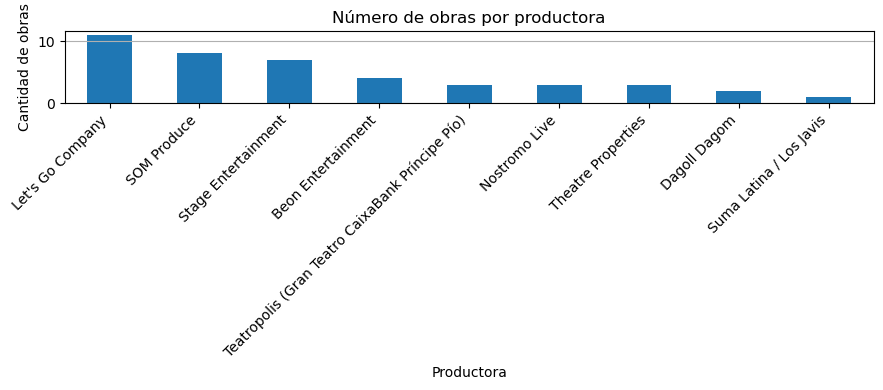

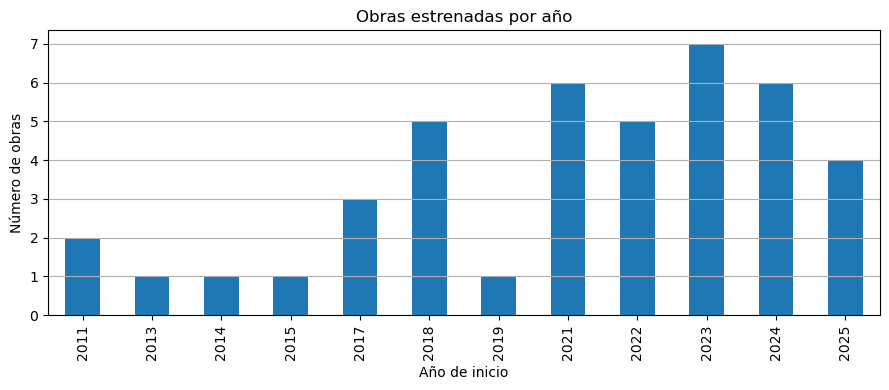

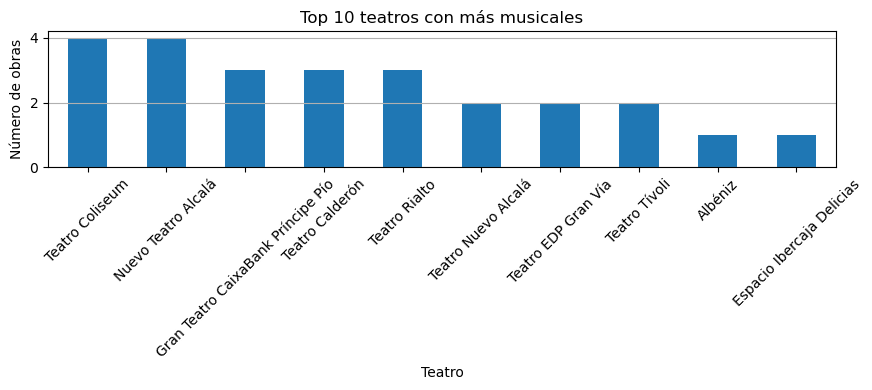

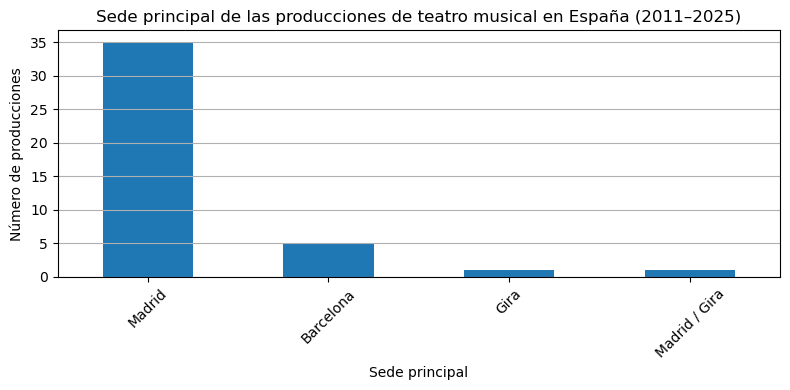

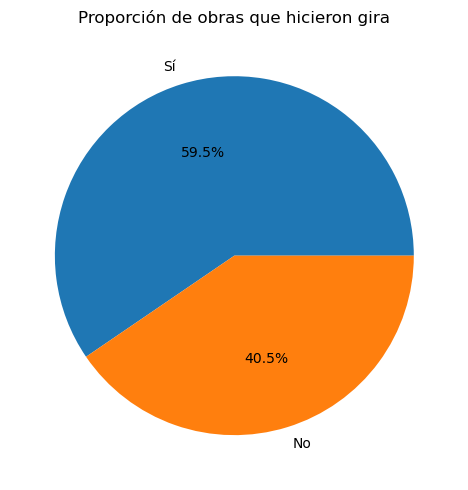

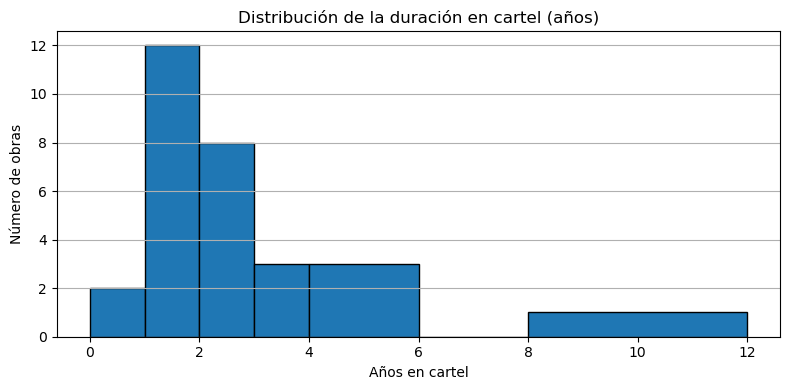

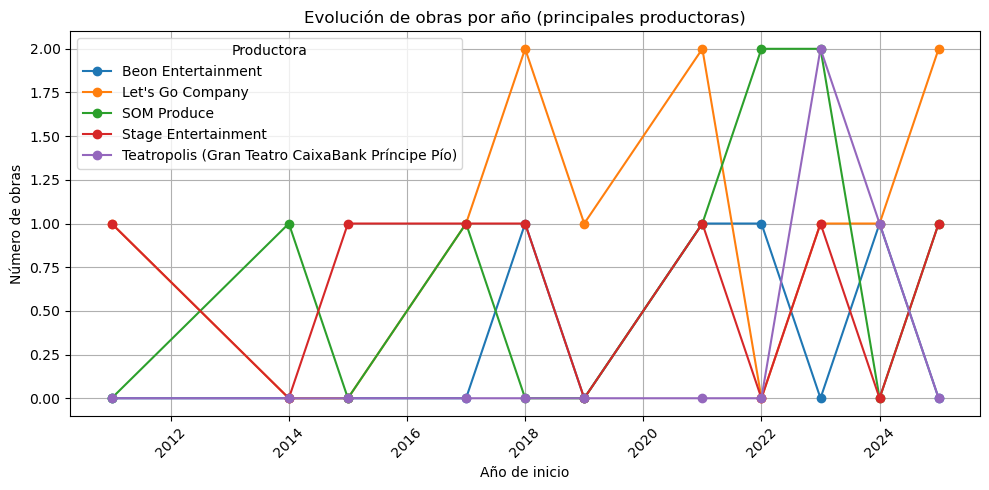

In [23]:
# ============================================================
# 0. EXPLORACIÓN INICIAL
# ============================================================

print("=== DIMENSIONES DEL DATASET ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

print("\n=== PRIMERAS FILAS ===")
display(df.head())

print("\n=== ÚLTIMAS FILAS ===")
display(df.tail())

print("\n=== INFO DEL DATAFRAME ===")
df.info()

print("\n=== DESCRIPTIVO ESTADÍSTICO (INCLUYE CATEGÓRICAS) ===")
display(df.describe(include="all").transpose())


# ============================================================
# 1. CALIDAD DE DATOS: NULOS, DUPLICADOS, VALORES ÚNICOS
# ============================================================

print("\n=== NULOS POR COLUMNA ===")
display(df.isnull().sum())

print("\n=== FILAS DUPLICADAS TOTALES ===")
print(df.duplicated().sum())

print("\n=== FILAS DUPLICADAS POR CLAVE (obra, productora, anio_inicio) ===")
dup_clave = df.duplicated(subset=["obra", "productora", "anio_inicio"]).sum()
print(f"Número de filas duplicadas por clave: {dup_clave}")

print("\n=== VALORES ÚNICOS POR COLUMNA ===")
display(df.nunique())

print("\n=== TIPOS DE DATO POR COLUMNA ===")
display(df.dtypes)


# ============================================================
# 2. LIMPIEZA Y NORMALIZACIÓN LIGERA DE TEXTO
# ============================================================

columnas_texto = ["obra", "productora", "teatro", "ciudad_principal", "gira"]

for col in columnas_texto:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Normalizar 'gira' a 'Sí' / 'No'
if "gira" in df.columns:
    mapa_gira = {
        "Si": "Sí", "SI": "Sí", "sí": "Sí", "sI": "Sí",
        "SÍ": "Sí", "Sí": "Sí",
        "No": "No", "NO": "No", "no": "No"
    }
    df["gira"] = df["gira"].replace(mapa_gira)

print("\n=== RE-CHEQUEO NULOS TRAS LIMPIEZA LIGERA ===")
display(df.isnull().sum())


# ============================================================
# 3. FEATURE ENGINEERING: DURACIÓN EN CARTEL
# ============================================================

import numpy as np

if "anio_inicio" in df.columns and "anio_fin" in df.columns:
    # Crear columna de duración solo cuando haya año de fin
    df["duracion"] = df["anio_fin"] - df["anio_inicio"]
    print("\n=== DESCRIPTIVO DE LA DURACIÓN EN CARTEL (AÑOS) ===")
    display(df["duracion"].describe())
else:
    print("\n[AVISO] No se ha creado 'duracion' porque falta 'anio_inicio' o 'anio_fin'.")


# ============================================================
# 4. VISUALIZACIONES UNIVARIADAS
# ============================================================

import matplotlib.pyplot as plt

# ------------------------ A) OBRAS POR PRODUCTORA ------------------------
# Crear copia para no tocar el df original
df_plot = df.copy()

# Renombrar productora larga para evitar solapamiento
df_plot["productora"] = df_plot["productora"].replace(
    {"Teatrópolis (Gran Teatro CaixaBank Príncipe Pío)": "Teatrópolis / Pío"}
)

# Gráfica revisada
plt.figure(figsize=(9, 4))
df_plot["productora"].value_counts().plot(kind="bar")
plt.title("Número de obras por productora")
plt.xlabel("Productora")
plt.ylabel("Cantidad de obras")
plt.xticks(rotation=45, ha='right')  # Mejor legibilidad
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# ------------------------ B) OBRAS POR AÑO DE INICIO ------------------------
if "anio_inicio" in df.columns:
    plt.figure(figsize=(9, 4))
    df["anio_inicio"].value_counts().sort_index().plot(kind="bar")
    plt.title("Obras estrenadas por año")
    plt.xlabel("Año de inicio")
    plt.ylabel("Número de obras")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

# ------------------------ C) TOP 10 TEATROS CON MÁS MUSICALES ------------------------
plt.figure(figsize=(9, 4))
df["teatro"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 teatros con más musicales")
plt.xlabel("Teatro")
plt.ylabel("Número de obras")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# ------------------------ D)Distribución de producciones por sede principal ------------------------
plt.figure(figsize=(8,4))
df['ciudad_principal'].value_counts().plot(kind='bar')

plt.title("Sede principal de las producciones de teatro musical en España (2011–2025)")
plt.xlabel("Sede principal")
plt.ylabel("Número de producciones")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ------------------------ E) PROPORCIÓN DE OBRAS QUE HICIERON GIRA ------------------------
if "gira" in df.columns:
    plt.figure(figsize=(5, 5))
    df["gira"].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.title("Proporción de obras que hicieron gira")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# ------------------------ F) DISTRIBUCIÓN DE LA DURACIÓN EN CARTEL ------------------------
plt.figure(figsize=(8,4))
plt.hist(df["duracion"], bins=[0,1,2,3,4,6,8,12], edgecolor='black')

plt.title("Distribución de la duración en cartel (años)")
plt.xlabel("Años en cartel")
plt.ylabel("Número de obras")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ============================================================
# 5. ANÁLISIS TEMPORAL POR PRODUCTORA (TOP 5)
# ============================================================

if "anio_inicio" in df.columns and "productora" in df.columns:
    top_prod = df["productora"].value_counts().head(5).index
    df_top = df[df["productora"].isin(top_prod)]

    tabla = (
        df_top
        .groupby(["anio_inicio", "productora"])
        .size()
        .unstack(fill_value=0)
        .sort_index()
    )

    plt.figure(figsize=(10, 5))
    for prod in tabla.columns:
        plt.plot(tabla.index, tabla[prod], marker="o", label=prod)

    plt.title("Evolución de obras por año (principales productoras)")
    plt.xlabel("Año de inicio")
    plt.ylabel("Número de obras")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title="Productora")
    plt.tight_layout()
    plt.show()
else:
    print("\n[AVISO] No se puede generar la evolución temporal por productora.")


In [24]:
df_2011 = df[df["anio_inicio"] >= 2011]

df_2011["productora"].value_counts()


productora
Let's Go Company                                    11
SOM Produce                                          8
Stage Entertainment                                  7
Beon Entertainment                                   4
Teatropolis (Gran Teatro CaixaBank Príncipe Pío)     3
Nostromo Live                                        3
Theatre Properties                                   3
Dagoll Dagom                                         2
Suma Latina / Los Javis                              1
Name: count, dtype: int64

In [25]:
musicales_2011 = df[df["anio_inicio"] == 2011]

musicales_2011.head()

,obra,productora,anio_inicio,anio_fin,teatro,ciudad_principal,gira,fuente_url,activa,duracion
15,El Rey León,Stage Entertainment,2011,NaN,Teatro Lope de Vega,Madrid,No,https://www.stage.es/musicales/el-rey-leon/,True,NaN
38,The Hole,Let's Go Company,2011,2023.0,Teatro Calderón / Giras,Madrid,Sí,https://letsgo.es/the-hole/,False,12.0


In [26]:


df.to_csv("musicales_limpio.csv", index=False, encoding="utf-8")
print("\nArchivo 'musicales_limpio.csv' guardado correctamente.")



Archivo 'musicales_limpio.csv' guardado correctamente.


El dataset evidencia una alta concentración del mercado del teatro musical en España durante el periodo 2011–2025. Los estrenos se agrupan mayoritariamente en Madrid, que actúa como plaza principal del sector, seguida a distancia por Barcelona. Las producciones sin sede fija se canalizan bajo la categoría Gira, lo que confirma un modelo dual: grandes títulos en capitales y el resto en circuitos itinerantes.

En términos de productoras, el liderazgo corresponde a Let’s Go Company, seguida de SOM Produce y Stage Entertainment, lo que refleja un ecosistema dominado por unos pocos operadores con elevada capacidad de producción. La tendencia por año muestra un crecimiento progresivo de estrenos, especialmente a partir de 2016, alineado con el auge del musical como industria cultural.

El 59,5% de las obras realizaron gira, lo que apunta a una estrategia de expansión territorial tras la explotación en plaza fija. La duración en cartel se distribuye de forma heterogénea, con mayoría de títulos entre 1 y 3 años, pero con casos excepcionales de larga permanencia que indican alto rendimiento comercial.

Finalmente, los teatros con mayor volumen de musicales —Coliseum, Nuevo Teatro Alcalá, Gran Teatro CaixaBank/Príncipe Pío y Calderón— consolidan su rol como infraestructura crítica para el desarrollo del musical en España.